In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
data1 = pd.read_csv('../Dataset/dataset_1.csv')
data2 = pd.read_csv('../Dataset/dataset_2.csv')

In [3]:
data1.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
data2.head()

,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,1,...,1,1,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,0,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,0,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,1,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidr1.com/,28,19,0,2,0,0,0,0,0,...,0,0,0,164,1662,312044,0,0,4,legitimate


In [5]:
# 1. qty_dot_url (Dataset 1) - total_of. (Dataset 2)
# 2. qty_hyphen_url (Dataset 1) - total_of- (Dataset 2)
# 3. qty_underline_url (Dataset 1) - total_of_ (Dataset 2)
# 4. qty_slash_url (Dataset 1) - total_of/ (Dataset 2)
# 5. qty_questionmark_url (Dataset 1) - total_of? (Dataset 2)
# 6. qty_equal_url (Dataset 1) - total_of= (Dataset 2)
# 7. qty_at_url (Dataset 1) - total_of@ (Dataset 2)
# 8. qty_and_url (Dataset 1) - total_of& (Dataset 2)
# 9. qty_tilde_url (Dataset 1) - total_of~ (Dataset 2)
# 10. qty_comma_url (Dataset 1) - total_of, (Dataset 2)
# 11. qty_asterisk_url (Dataset 1) - total_of* (Dataset 2)
# 12. qty_percent_url (Dataset 1) - total_of% (Dataset 2)
# 13. qty_dollar_url (Dataset 1) - total_of$ (Dataset 2)
# 14. url_google_index (Dataset 1) - google_index (Dataset 2)
# 15. tld_present_params (Dataset 1) - tld_in_path (Dataset 2)
# 16. qty_redirects (Dataset 1) - nb_redirection (Dataset 2)
# 17. length_url (Dataset 1) - url_length (Dataset 2)
# 18. url_shortened (Dataset 1) - shortening_service (Dataset 2)
# 19. domain_length (Dataset 1) - hostname_length (Dataset 2)
# 20. domain_in_ip (Dataset 1) - ip (Dataset 2)

In [6]:
data1 = data1[['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_tilde_url', 'qty_comma_url', 'qty_asterisk_url', 'qty_percent_url', 'qty_dollar_url', 'qty_redirects', 'domain_length', 'length_url', 'url_google_index', 'tld_present_params','url_shortened', 'domain_in_ip', 'phishing']]

In [7]:
len(data1.columns)

21

In [8]:
data2 = data2[['total_of.', 'total_of-', 'total_of_', 'total_of/', 'total_of?', 'total_of=', 'total_of@', 'total_of&', 'total_of~', 'total_of,', 'total_of*', 'total_of%', 'total_of$', 'nb_redirection', 'hostname_length', 'url_length',  'google_index', 'tld_in_path', 'shortening_service', 'ip', 'status']]

In [9]:
len(data2.columns)

21

In [10]:
data2['status'] = data2['status'].map({'phishing':1,'legitimate':0})

In [11]:
x = data1['url_google_index'].to_list()
for i in range(len(x)):
    if x[i]<0:
        x[i]=0
data1['url_google_index'] = x

In [12]:
x = data1['tld_present_params'].to_list()
for i in range(len(x)):
    if x[i]<0:
        x[i]=0
data1['tld_present_params'] = x

In [13]:
x = data1['qty_redirects'].to_list()
for i in range(len(x)):
    if x[i]<0:
        x[i]=0
data1['qty_redirects'] = x

In [14]:
def column_statistics(df):
    # Calculate descriptive statistics
    desc_stats = df.describe().T
    
    # Calculate additional statistics
    median = df.median()
    mode = df.mode().iloc[0]
    min_values = df.min()
    max_values = df.max()
    mean_values = df.mean()
    std_values = df.std()
    percentiles = df.quantile([0.25, 0.5, 0.75]).T
    
    # Add median and mode to descriptive statistics
    desc_stats['median'] = median
    desc_stats['mode'] = mode
    desc_stats['25%'] = percentiles[0.25]
    desc_stats['50%'] = percentiles[0.5]
    desc_stats['75%'] = percentiles[0.75]
    
    # Rearrange columns to desired order
    desc_stats = desc_stats[['min', 'max', 'mean', 'std']]#, 'median', 'mode', '25%', '50%', '75%']]
    
    return desc_stats

In [15]:
a = column_statistics(data1[data1['phishing']==1])

In [16]:
b = column_statistics(data2[data2['status']==1])

In [17]:
c = column_statistics(data1[data1['phishing']==0])

In [18]:
d = column_statistics(data2[data2['status']==0])

In [19]:
c['mean']

qty_dot_url              2.037638
qty_hyphen_url           0.165776
qty_underline_url        0.022483
qty_slash_url            0.319379
qty_questionmark_url     0.000190
qty_equal_url            0.023707
qty_at_url               0.000034
qty_and_url              0.011828
qty_tilde_url            0.000328
qty_comma_url            0.000586
qty_asterisk_url         0.000000
qty_percent_url          0.075241
qty_dollar_url           0.000000
qty_redirects            0.472121
domain_length           18.514121
length_url              21.245690
url_google_index         0.003345
tld_present_params       0.000328
url_shortened            0.000155
domain_in_ip             0.000259
phishing                 0.000000
Name: mean, dtype: float64

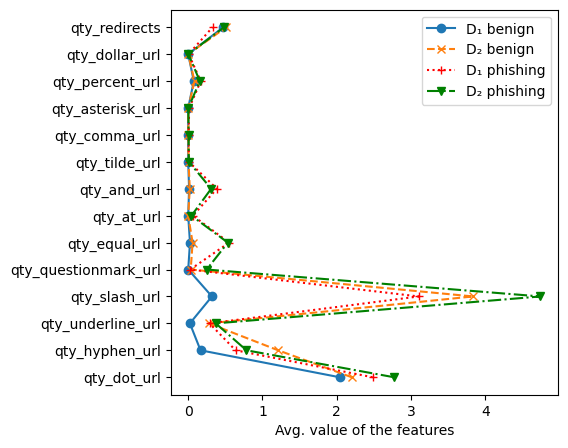

In [57]:
plt.figure(figsize=(5,5))

plt.plot(c['mean'][:-7], data1.columns[:-7], marker='o', linestyle='-')
plt.plot(d['mean'][:-7], data1.columns[:-7], marker='x', linestyle='--')

plt.plot(a['mean'][:-7], data1.columns[:-7], marker='+', linestyle='dotted', color = 'r')
plt.plot(b['mean'][:-7], data1.columns[:-7], marker='v', linestyle='dashdot', color='g')


# plt.plot(c['min'][:-7], data1.columns[:-7], marker='o')
# plt.plot(d['min'][:-7], data1.columns[:-7], marker='x')

# plt.plot(c['max'][:-7], data1.columns[:-7], marker='o')
# plt.plot(d['max'][:-7], data1.columns[:-7], marker='x')

# plt.plot(c['std'][:-7], data1.columns[:-7], marker='o')
# plt.plot(d['std'][:-7], data1.columns[:-7], marker='x')
plt.legend(['D\u2081 benign', 'D\u2082 benign', "D\u2081 phishing", "D\u2082 phishing"], loc="best")
plt.xlabel('Avg. value of the features')
# plt.title('Mean values of the numerical dataset columns')
plt.show()

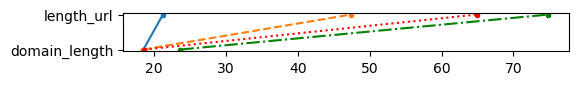

In [45]:
plt.figure(figsize=(5.75,0.5))

plt.plot(c['mean'][-7:-5], data1.columns[-7:-5], marker='.', linestyle='-')
plt.plot(d['mean'][-7:-5], data1.columns[-7:-5], marker='.', linestyle='--')

plt.plot(a['mean'][-7:-5], data1.columns[-7:-5], marker='.', linestyle='dotted', color = 'r')
plt.plot(b['mean'][-7:-5], data1.columns[-7:-5], marker='.', linestyle='dashdot', color='g')


# plt.plot(c['min'][-7:-5], data1.columns[-7:-5], marker='o')
# plt.plot(d['min'][-7:-5], data1.columns[-7:-5], marker='x')

# plt.plot(c['max'][-7:-5], data1.columns[-7:-5], marker='o')
# plt.plot(d['max'][-7:-5], data1.columns[-7:-5], marker='x')

# plt.plot(c['std'][-7:-5], data1.columns[-7:-5], marker='o')
# plt.plot(d['std'][-7:-5], data1.columns[-7:-5], marker='x')
# plt.legend(['dataset1 benign', 'dataset2 benign', "dataset1 phishing", "dataset2 phishing"], loc="best")
# plt.title('Mean values of the numerical dataset columns')
plt.show()

In [21]:
# plt.figure(figsize=(5,5))

# plt.plot(a['mean'][:-1], data1.columns[:-1], marker='o')
# plt.plot(b['mean'][:-1], data1.columns[:-1], marker='x')
# # plt.plot(a['min'][:-1], data1.columns[:-1], marker='o')
# # plt.plot(b['min'][:-1], data1.columns[:-1], marker='x')

# # plt.plot(a['max'][:-1], data1.columns[:-1], marker='o')
# # plt.plot(b['max'][:-1], data1.columns[:-1], marker='x')

# # plt.plot(a['std'][:-1], data1.columns[:-1], marker='o')
# # plt.plot(b['std'][:-1], data1.columns[:-1], marker='x')
# plt.legend(['mean_dataset_1', 'mean_dataset_2', "min_dataset_1", "min_dataset_2", "max_dataset_1", "max_dataset_2", 'std_dataset_1', 'std_dataset_2'], loc="lower right")
# plt.show()

In [22]:
print(data1['url_google_index'].value_counts())
print(data1['tld_present_params'].value_counts())
print(data1['url_shortened'].value_counts())
print(data1['domain_in_ip'].value_counts())

url_google_index
0    88432
1      215
Name: count, dtype: int64
tld_present_params
0    86472
1     2175
Name: count, dtype: int64
url_shortened
0    88161
1      486
Name: count, dtype: int64
domain_in_ip
0    88446
1      201
Name: count, dtype: int64


In [23]:
print(data2['google_index'].value_counts())
print(data2['tld_in_path'].value_counts())
print(data2['shortening_service'].value_counts())
print(data2['ip'].value_counts())

google_index
1    10376
0     9055
Name: count, dtype: int64
tld_in_path
0    18158
1     1273
Name: count, dtype: int64
shortening_service
0    17035
1     2396
Name: count, dtype: int64
ip
1    12621
0     6810
Name: count, dtype: int64


In [67]:
d1 = dict(data1['url_google_index'].value_counts())
d2 = dict(data1['tld_present_params'].value_counts())
d3 = dict(data1['url_shortened'].value_counts())
d4 = dict(data1['domain_in_ip'].value_counts())

print(d1)
d1_dict_list = [dict(sorted(d1.items())), dict(sorted(d2.items())), dict(sorted(d3.items())), dict(sorted(d4.items()))]

for i in range(len(d1_dict_list)):
    ss = sum(d1_dict_list[i].values())
    d1_dict_list[i][0]=100*d1_dict_list[i][0]/ss
    d1_dict_list[i][1]=100*d1_dict_list[i][1]/ss

d1_dict_list

{0: 88432, 1: 215}


[{0: 99.7574650016357, 1: 0.24253499836429884},
 {0: 97.54644827236116, 1: 2.453551727638837},
 {0: 99.4517580967207, 1: 0.5482419032792988},
 {0: 99.77325797827338, 1: 0.22674202172662358}]

In [25]:
d5 = dict(data2['google_index'].value_counts())
d6 = dict(data2['tld_in_path'].value_counts())
d7 = dict(data2['shortening_service'].value_counts())
d8 = dict(data2['ip'].value_counts())

d2_dict_list = [dict(sorted(d5.items())), dict(sorted(d6.items())), dict(sorted(d7.items())), dict(sorted(d8.items()))]

for i in range(len(d2_dict_list)):
    ss = sum(d2_dict_list[i].values())
    d2_dict_list[i][0]=100*d2_dict_list[i][0]/ss
    d2_dict_list[i][1]=100*d2_dict_list[i][1]/ss

d2_dict_list

[{0: 46.600792547990324, 1: 53.399207452009676},
 {0: 93.44861304101693, 1: 6.551386958983068},
 {0: 87.66918841027224, 1: 12.330811589727755},
 {0: 35.04708970202254, 1: 64.95291029797745}]

[{0: 99.7574650016357, 1: 0.24253499836429884}, {0: 97.54644827236116, 1: 2.453551727638837}, {0: 99.4517580967207, 1: 0.5482419032792988}, {0: 99.77325797827338, 1: 0.22674202172662358}]
[{0: 46.600792547990324, 1: 53.399207452009676}, {0: 93.44861304101693, 1: 6.551386958983068}, {0: 87.66918841027224, 1: 12.330811589727755}, {0: 35.04708970202254, 1: 64.95291029797745}]


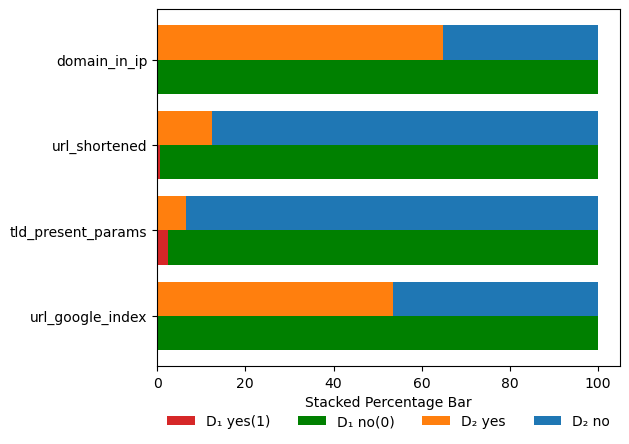

<Figure size 575x500 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt
import numpy as np

def plot_split_bars_side_by_side_horizontal(data_dicts1, data_dicts2, labels=None, colors1=('C3', 'g'), colors2=('C1', '#1f77b4'), bar_height=0.4):
    """
    Plots a horizontal bar graph with two sets of bars side by side, where each bar is split into two segments
    corresponding to the values of two key-value pairs in each dictionary.

    Parameters:
    - data_dicts1: List of dictionaries, each containing two key-value pairs {1: value1, 0: value0} (first set).
    - data_dicts2: List of dictionaries, each containing two key-value pairs {1: value1, 0: value0} (second set).
    - labels: List of labels for each pair of bars (optional).
    - colors1: Tuple of two colors for the two parts of each bar from the first set (default is ('skyblue', 'pink')).
    - colors2: Tuple of two colors for the two parts of each bar from the second set (default is ('lightgreen', 'salmon')).
    - bar_height: Height of each bar (default is 0.4).
    """

    # Number of groups (bars)
    n_bars = len(data_dicts1)

    # If no labels are provided, create default labels
    if labels is None:
        labels = [f'Group {i+1}' for i in range(n_bars)]

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Define the positions for the bars
    index = np.arange(n_bars)

    # Loop through each pair of dictionaries (data_dicts1 and data_dicts2)
    for i in range(n_bars):
        # Extract the two parts for each dictionary in the first set (data_dicts1)
        part1_1 = data_dicts1[i][1]
        part0_1 = data_dicts1[i][0]

        # Plot the first part of the bar (first set)
        ax.barh(index[i] - bar_height/2, part1_1, color=colors1[0], height=bar_height, label='D\u2081 yes(1)' if i == 0 else "")
        # Plot the second part of the bar (first set), stacked on top of the first
        ax.barh(index[i] - bar_height/2, part0_1, left=part1_1, color=colors1[1], height=bar_height, label='D\u2081 no(0)' if i == 0 else "")

        # Extract the two parts for each dictionary in the second set (data_dicts2)
        part1_2 = data_dicts2[i][1]
        part0_2 = data_dicts2[i][0]

        # Plot the first part of the bar (second set)
        ax.barh(index[i] + bar_height/2, part1_2, color=colors2[0], height=bar_height, label='D\u2082 yes' if i == 0 else "")
        # Plot the second part of the bar (second set), stacked on top of the first
        ax.barh(index[i] + bar_height/2, part0_2, left=part1_2, color=colors2[1], height=bar_height, label='D\u2082 no' if i == 0 else "")

    # Add labels, title, and customized legend at the bottom in a single line
    ax.set_yticks(index)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Stacked Percentage Bar')
    # ax.set_title('H')

    # Add legend at the bottom, in one line
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)

    # Adjust layout to make space for the legend
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adds space for the legend at the bottom

    plt.figure(figsize=(5.75,5))

    # Show the plot
    plt.show()

print(d1_dict_list)
print(d2_dict_list)
plot_split_bars_side_by_side_horizontal(d1_dict_list, d2_dict_list, labels=data1.columns[-5:-1])

In [70]:
d1_phish = data1[data1['phishing']==1]
d1_ben = data1[data1['phishing']==0]

d2_phish = data2[data2['status']==1]
d2_ben = data2[data2['status']==0]

In [90]:
d1_google_phish_dict = dict(d1_phish['url_google_index'].value_counts())
for i in d1_google_phish_dict:
    d1_google_phish_dict[i] = 100*d1_google_phish_dict[i]/len(d1_phish['url_google_index'])
d1_google_phish_dict = collections.OrderedDict(sorted(d1_google_phish_dict.items()))
print(d1_google_phish_dict)

d1_tld_phish_dict = dict(d1_phish['tld_present_params'].value_counts())
for i in d1_tld_phish_dict:
    d1_tld_phish_dict[i] = 100*d1_tld_phish_dict[i]/len(d1_phish['tld_present_params'])
d1_tld_phish_dict = collections.OrderedDict(sorted(d1_tld_phish_dict.items()))
print(d1_tld_phish_dict)

d1_url_phish_dict = dict(d1_phish['url_shortened'].value_counts())
for i in d1_url_phish_dict:
    d1_url_phish_dict[i] = 100*d1_url_phish_dict[i]/len(d1_phish['url_shortened'])
d1_url_phish_dict = collections.OrderedDict(sorted(d1_url_phish_dict.items()))
print(d1_url_phish_dict)

d1_dom_phish_dict = dict(d1_phish['domain_in_ip'].value_counts())
for i in d1_dom_phish_dict:
    d1_dom_phish_dict[i] = 100*d1_dom_phish_dict[i]/len(d1_phish['domain_in_ip'])
d1_dom_phish_dict = collections.OrderedDict(sorted(d1_dom_phish_dict.items()))
print(d1_dom_phish_dict)

OrderedDict([(0, 99.93147779554279), (1, 0.06852220445720625)])
OrderedDict([(0, 92.96505367572682), (1, 7.034946324273175)])
OrderedDict([(0, 98.44356707018632), (1, 1.556432929813685)])
OrderedDict([(0, 99.39308904623617), (1, 0.6069109537638268)])


In [91]:
d1_google_ben_dict = dict(d1_ben['url_google_index'].value_counts())
for i in d1_google_ben_dict:
    d1_google_ben_dict[i] = 100*d1_google_ben_dict[i]/len(d1_ben['url_google_index'])
d1_google_ben_dict = collections.OrderedDict(sorted(d1_google_ben_dict.items()))
print(d1_google_ben_dict)

d1_tld_ben_dict = dict(d1_ben['tld_present_params'].value_counts())
for i in d1_tld_ben_dict:
    d1_tld_ben_dict[i] = 100*d1_tld_ben_dict[i]/len(d1_ben['tld_present_params'])
d1_tld_ben_dict = collections.OrderedDict(sorted(d1_tld_ben_dict.items()))
print(d1_tld_ben_dict)

d1_url_ben_dict = dict(d1_ben['url_shortened'].value_counts())
for i in d1_url_ben_dict:
    d1_url_ben_dict[i] = 100*d1_url_ben_dict[i]/len(d1_ben['url_shortened'])
d1_url_ben_dict = collections.OrderedDict(sorted(d1_url_ben_dict.items()))
print(d1_url_ben_dict)

d1_dom_ben_dict = dict(d1_ben['domain_in_ip'].value_counts())
for i in d1_dom_ben_dict:
    d1_dom_ben_dict[i] = 100*d1_dom_ben_dict[i]/len(d1_ben['domain_in_ip'])
d1_dom_ben_dict = collections.OrderedDict(sorted(d1_dom_ben_dict.items()))
print(d1_dom_ben_dict)

OrderedDict([(0, 99.6655172413793), (1, 0.33448275862068966)])
OrderedDict([(0, 99.96724137931035), (1, 0.032758620689655175)])
OrderedDict([(0, 99.98448275862069), (1, 0.015517241379310345)])
OrderedDict([(0, 99.97413793103448), (1, 0.02586206896551724)])


In [92]:
d2_google_phish_dict = dict(d2_phish['google_index'].value_counts())
for i in d2_google_phish_dict:
    d2_google_phish_dict[i] = 100*d2_google_phish_dict[i]/len(d2_phish['google_index'])
d2_google_phish_dict = collections.OrderedDict(sorted(d2_google_phish_dict.items()))
print(d2_google_phish_dict)

d2_tld_phish_dict = dict(d2_phish['tld_in_path'].value_counts())
for i in d2_tld_phish_dict:
    d2_tld_phish_dict[i] = 100*d2_tld_phish_dict[i]/len(d2_phish['tld_in_path'])
d2_tld_phish_dict = collections.OrderedDict(sorted(d2_tld_phish_dict.items()))
print(d2_tld_phish_dict)

d2_url_phish_dict = dict(d2_phish['shortening_service'].value_counts())
for i in d2_url_phish_dict:
    d2_url_phish_dict[i] = 100*d2_url_phish_dict[i]/len(d2_phish['shortening_service'])
d2_url_phish_dict = collections.OrderedDict(sorted(d2_url_phish_dict.items()))
print(d2_url_phish_dict)

d2_dom_phish_dict = dict(d2_phish['ip'].value_counts())
for i in d2_dom_phish_dict:
    d2_dom_phish_dict[i] = 100*d2_dom_phish_dict[i]/len(d2_phish['ip'])
d2_dom_phish_dict = collections.OrderedDict(sorted(d2_dom_phish_dict.items()))
print(d2_dom_phish_dict)

OrderedDict([(0, 10.149253731343284), (1, 89.85074626865672)])
OrderedDict([(0, 91.40504374678332), (1, 8.594956253216676)])
OrderedDict([(0, 84.34379825012867), (1, 15.656201749871332)])
OrderedDict([(0, 30.355120946989192), (1, 69.64487905301081)])


In [93]:
d2_google_ben_dict = dict(d2_ben['google_index'].value_counts())
for i in d2_google_ben_dict:
    d2_google_ben_dict[i] = 100*d2_google_ben_dict[i]/len(d2_ben['google_index'])
d2_google_ben_dict = collections.OrderedDict(sorted(d2_google_ben_dict.items()))
print(d2_google_ben_dict)

d2_tld_ben_dict = dict(d2_ben['tld_in_path'].value_counts())
for i in d2_tld_ben_dict:
    d2_tld_ben_dict[i] = 100*d2_tld_ben_dict[i]/len(d2_ben['tld_in_path'])
d2_tld_ben_dict = collections.OrderedDict(sorted(d2_tld_ben_dict.items()))
print(d2_tld_ben_dict)

d2_url_ben_dict = dict(d2_ben['shortening_service'].value_counts())
for i in d2_url_ben_dict:
    d2_url_ben_dict[i] = 100*d2_url_ben_dict[i]/len(d2_ben['shortening_service'])
d2_url_ben_dict = collections.OrderedDict(sorted(d2_url_ben_dict.items()))
print(d2_url_ben_dict)

d2_dom_ben_dict = dict(d2_ben['ip'].value_counts())
for i in d2_dom_ben_dict:
    d2_dom_ben_dict[i] = 100*d2_dom_ben_dict[i]/len(d2_ben['ip'])
d2_dom_ben_dict = collections.OrderedDict(sorted(d2_dom_ben_dict.items()))
print(d2_dom_ben_dict)

OrderedDict([(0, 83.04857966241252), (1, 16.951420337587486)])
OrderedDict([(0, 95.49197200494031), (1, 4.508027995059695)])
OrderedDict([(0, 90.99423631123919), (1, 9.005763688760807)])
OrderedDict([(0, 39.73857554549197), (1, 60.26142445450803)])


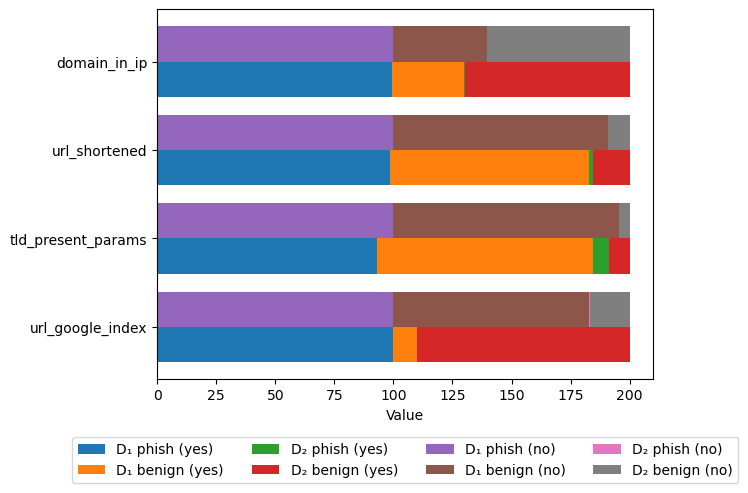

In [123]:
def plot_stacked_bars_horizontal_double(data1, data2, labels, feature_names):
    """
    Plot horizontal stacked bar charts for two sets of instances with some distance between the bars.

    Parameters:
    - data1: 2D list or array for the first set of instances.
    - data2: 2D list or array for the second set of instances.
    - labels: list of labels for each instance.
    - feature_names: list of feature names for each stack.
    """
    # Convert data to numpy arrays
    data1 = np.array(data1)
    data2 = np.array(data2)

    # Number of instances and number of features
    num_instances, num_features = data1.shape

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create the bar positions with distance between the two sets
    bar_positions1 = np.arange(num_instances) - 0.2
    bar_positions2 = np.arange(num_instances) + 0.2

    # Initialize the left position for stacking for both datasets
    left1 = np.zeros(num_instances)
    left2 = np.zeros(num_instances)

    # Plot each stack for the first dataset (narrower width)
    for i in range(num_features):
        ax.barh(bar_positions1, data1[:, i], left=left1, height=0.4, label=f"{feature_names[i]} (yes)")
        left1 += data1[:, i]

    # Plot each stack for the second dataset (narrower width)
    for i in range(num_features):
        ax.barh(bar_positions2, data2[:, i], left=left2, height=0.4, label=f"{feature_names[i]} (no)")
        left2 += data2[:, i]

    # Add labels and title
    ax.set_yticks(np.arange(num_instances))
    ax.set_yticklabels(labels)
    ax.set_xlabel('Value')

    # Add a legend at the bottom in two lines
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4)

    plt.show()

# Example usage
data1 = [
    [d1_google_phish_dict[0], d2_google_phish_dict[0], d1_google_phish_dict[1], d2_google_phish_dict[1]],   # Instance 1
    [d1_tld_phish_dict[0], d2_tld_phish_dict[0], d1_tld_phish_dict[1], d2_tld_phish_dict[1]],   # Instance 2
    [d1_url_phish_dict[0], d2_url_phish_dict[0], d1_url_phish_dict[1], d2_url_phish_dict[1]],   # Instance 3
    [d1_dom_phish_dict[0], d2_dom_phish_dict[0], d1_dom_phish_dict[1], d2_dom_phish_dict[1]]    # Instance 4
]

data2 = [
    [d1_google_ben_dict[0], d2_google_ben_dict[0], d1_google_ben_dict[1], d2_google_ben_dict[1]],   # Instance 1
    [d1_tld_ben_dict[0], d2_tld_ben_dict[0], d1_tld_ben_dict[1], d2_tld_ben_dict[1]],   # Instance 2
    [d1_url_ben_dict[0], d2_url_ben_dict[0], d1_url_ben_dict[1], d2_url_ben_dict[1]],   # Instance 3
    [d1_dom_ben_dict[0], d2_dom_ben_dict[0], d1_dom_ben_dict[1], d2_dom_ben_dict[1]]    # Instance 4
]



labels = ['url_google_index', 'tld_present_params', 'url_shortened', 'domain_in_ip']
dum_label = ['google_index', 'tld_in_path', 'shortening_service', 'ip']
feature_names = ['D\u2081 phish', 'D\u2081 benign', 'D\u2082 phish', 'D\u2082 benign']

plot_stacked_bars_horizontal_double(data1, data2, labels, feature_names)
